In [1]:
import numpy as np
import matplotlib as mpl
import pylab as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Figure 1

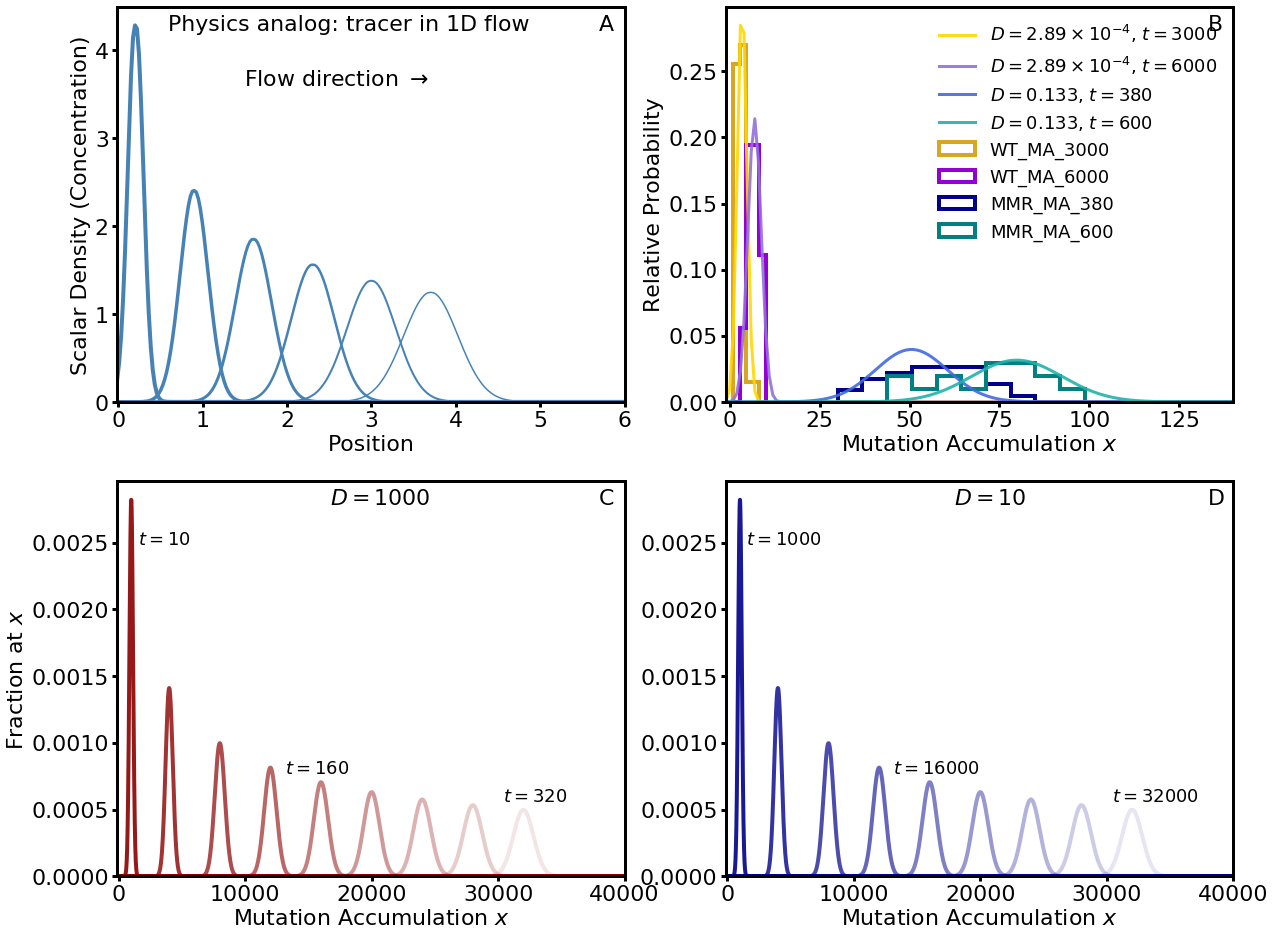

In [36]:
# set plot parameters
width  = 20
height = 16
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(width, height))
    
# define advection-diffusion equation for later
def advectdiff(x, t, D, xi):
    ad_dist = (1/np.sqrt(4*np.pi*D*t))*np.exp(-(x - D*xi*t)**2/(4*D*t))
    return ad_dist
    
### Begin going through each sub-plot from left to right, top to bottom, starting from top-left
###### Axis 1 ######

# load data from hydro simulation which shows the scalar diffusion of a tracer in a fluid (Athena++ code)
sd = np.load('scalar_diff.npz')

# the array is only plotted from 255: due to pdf plotting issues causing the line to extend outside the axes
ax1.plot(sd['scalar_diff1'][255:,1], sd['scalar_diff1'][255:,2], linestyle='-', linewidth=4, color='steelblue', label=r'$t=0$', alpha=1)
ax1.plot(sd['scalar_diff2'][255:,1], sd['scalar_diff2'][255:,2], linestyle='-', linewidth=3.5, color='steelblue', label=r'$t=70$', alpha=1)
ax1.plot(sd['scalar_diff3'][255:,1], sd['scalar_diff3'][255:,2], linestyle='-', linewidth=3, color='steelblue', label=r'$t=140$', alpha=1)
ax1.plot(sd['scalar_diff4'][255:,1], sd['scalar_diff4'][255:,2], linestyle='-', linewidth=2.5, color='steelblue', label=r'$t=210$', alpha=1)
ax1.plot(sd['scalar_diff5'][255:,1], sd['scalar_diff5'][255:,2], linestyle='-', linewidth=2, color='steelblue', label=r'$t=280$', alpha=1)
ax1.plot(sd['scalar_diff6'][255:,1], sd['scalar_diff6'][255:,2], linestyle='-', linewidth=1.5, color='steelblue', label=r'$t=350$', alpha=1)

# axis 1 parameters
#ax1.set_yscale('log')
#ax1.set_xscale('log')
#ax1.set_xlabel(r'radius [au]',fontsize=22)
#ax1.set_ylabel(r'time [yr]',fontsize=22)
ax1.tick_params(labelsize=22)
ax1.set_xlim(-0.01,6)
ax1.set_ylim(0,None)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.tick_params(axis='both', which='major', length=5, width=3)
ax1.tick_params(axis='both', which='minor', length=3, width=2)

ax1.set_xlabel(r'Position',fontsize=22)
ax1.set_ylabel(r'Scalar Density (Concentration)',fontsize=22)

ax1.text(0.10, 0.94, r'Physics analog: tracer in 1D flow', fontsize=22,
         color='black',
         transform=ax1.transAxes)

ax1.text(0.25, 0.80, r'Flow direction $\rightarrow$', fontsize=22,
         color='black',
         transform=ax1.transAxes)

ax1.text(0.95, 0.94, r'A', fontsize=22,
         color='black',
         transform=ax1.transAxes)
    
###### Axis 2 ######

# load data (WT_MA_3000, WT_MA_6000 and MMR_MA_380 come from Lee et at. 2012, while MMR_MA_600 is sourced by authors)
ma = np.load('mutation_accumulation.npz')

x = np.arange(-1,140,1)

# data is binned for easier use
hist1 = ax2.hist(ma['WT_MA_3000'], bins = np.linspace(1,10,6), histtype='step', density=True, linewidth=4, color='goldenrod', label=r'WT_MA_3000')
hist2 = ax2.hist(ma['WT_MA_6000'], bins = np.linspace(1,10,6), histtype='step', density=True, linewidth=4, color='darkviolet', label=r'WT_MA_6000')
hist3 = ax2.hist(ma['MMR_MA_380'], bins = np.linspace(30,140,17), histtype='step', density=True, linewidth=4, color='darkblue', label=r'MMR_MA_380')
hist4 = ax2.hist(ma['MMR_MA_600'], bins = np.linspace(30,140,17), histtype='step', density=True, linewidth=4, color='teal', label=r'MMR_MA_600')

# plot the solutions to the advection-diffusion equation which match the data
ax2.plot(x, advectdiff(x, 3000, 2.887E-4, 4), linestyle='-', linewidth=3, color='gold', label=r'$D=2.89\times 10^{-4}$, $t=3000$', alpha=0.9)
ax2.plot(x, advectdiff(x, 6000, 2.887E-4, 4), linestyle='-', linewidth=3, color='mediumpurple', label=r'$D=2.89\times 10^{-4}$, $t=6000$', alpha=0.9)
ax2.plot(x, advectdiff(x, 380, 0.133, 1), linestyle='-', linewidth=3, color='royalblue', label=r'$D=0.133$, $t=380$', alpha=0.9)
ax2.plot(x, advectdiff(x, 600, 0.133, 1), linestyle='-', linewidth=3, color='lightseagreen', label=r'$D=0.133$, $t=600$', alpha=0.9)

# axis 2 parameters
#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel(r'Mutation Accumulation $x$',fontsize=22)
ax2.set_ylabel(r'Relative Probability',fontsize=22)
ax2.tick_params(labelsize=22)
ax2.set_xlim(-1,140)
ax2.set_ylim(0,None)
ax2.spines['top'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)
ax2.tick_params(axis='both', which='major', length=5, width=3)
ax2.tick_params(axis='both', which='minor', length=3, width=2)

# axis 2 legend
ax2.legend(loc=1, shadow=False, fancybox=False, numpoints=1, frameon=False, fontsize=18)

ax2.text(0.95, 0.94, r'B', fontsize=22,
         color='black',
         transform=ax2.transAxes)    
    
###### Axis 3 ######

# define some constants
D = 1000
x0 = 0
xi = 1/10

x = np.arange(-40,50000,1)

ax3.plot(x, advectdiff(x, 10, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 10', alpha=0.9)
ax3.plot(x, advectdiff(x, 40, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 40', alpha=0.8)
ax3.plot(x, advectdiff(x, 80, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 80', alpha=0.7)
ax3.plot(x, advectdiff(x, 120, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 120', alpha=0.6)
ax3.plot(x, advectdiff(x, 160, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 160', alpha=0.5)
ax3.plot(x, advectdiff(x, 200, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 200', alpha=0.4)
ax3.plot(x, advectdiff(x, 240, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 240', alpha=0.3)
ax3.plot(x, advectdiff(x, 280, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 280', alpha=0.2)
ax3.plot(x, advectdiff(x, 320, D, xi), linestyle='-', linewidth=4, color='darkred', label=r't = 320', alpha=0.1)

# axis 3 parameters
#ax3.set_yscale('log')
#ax3.set_xscale('log')
ax3.set_ylabel(r'Fraction at $x$',fontsize=22)
ax3.set_xlabel(r'Mutation Accumulation $x$',fontsize=22)
ax3.tick_params(labelsize=22)
ax3.set_xlim(-100,40000)
ax3.set_ylim(0,None)
ax3.spines['top'].set_linewidth(3)
ax3.spines['bottom'].set_linewidth(3)
ax3.spines['left'].set_linewidth(3)
ax3.spines['right'].set_linewidth(3)
ax3.tick_params(axis='both', which='major', length=5, width=3)
ax3.tick_params(axis='both', which='minor', length=3, width=2)

ax3.text(0.04, 0.84, r'$t=10$', fontsize=18,
         color='black',
         transform=ax3.transAxes)

ax3.text(0.33, 0.26, r'$t=160$', fontsize=18,
         color='black',
         transform=ax3.transAxes)

ax3.text(0.76, 0.19, r'$t=320$', fontsize=18,
         color='black',
         transform=ax3.transAxes)

ax3.text(0.42, 0.94, r'$D=1000$', fontsize=22,
         color='black',
         transform=ax3.transAxes)

ax3.text(0.95, 0.94, r'C', fontsize=22,
         color='black',
         transform=ax3.transAxes)

###### Axis 4 ######

# define some constants
D = 10
x0 = 0
xi = 1/10

x = np.arange(-40,50000,1)

ax4.plot(x, advectdiff(x, 1000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 1000', alpha=0.9)
ax4.plot(x, advectdiff(x, 4000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 4000', alpha=0.8)
ax4.plot(x, advectdiff(x, 8000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 8000', alpha=0.7)
ax4.plot(x, advectdiff(x, 12000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 12000', alpha=0.6)
ax4.plot(x, advectdiff(x, 16000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 16000', alpha=0.5)
ax4.plot(x, advectdiff(x, 20000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 20000', alpha=0.4)
ax4.plot(x, advectdiff(x, 24000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 24000', alpha=0.3)
ax4.plot(x, advectdiff(x, 28000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 28000', alpha=0.2)
ax4.plot(x, advectdiff(x, 32000, D, xi), linestyle='-', linewidth=4, color='darkblue', label=r't = 32000', alpha=0.1)

# axis 4 parameters
#ax4.set_yscale('log')
#ax4.set_xscale('log')
#ax4.set_ylabel(r'radius [au]',fontsize=22)
ax4.set_xlabel(r'Mutation Accumulation $x$',fontsize=22)
ax4.tick_params(labelsize=22)
ax4.set_xlim(-100,40000)
ax4.set_ylim(0,None)
ax4.spines['top'].set_linewidth(3)
ax4.spines['bottom'].set_linewidth(3)
ax4.spines['left'].set_linewidth(3)
ax4.spines['right'].set_linewidth(3)
ax4.tick_params(axis='both', which='major', length=5, width=3)
ax4.tick_params(axis='both', which='minor', length=3, width=2)

ax4.text(0.04, 0.84, r'$t=1000$', fontsize=18,
         color='black',
         transform=ax4.transAxes)

ax4.text(0.33, 0.26, r'$t=16000$', fontsize=18,
         color='black',
         transform=ax4.transAxes)

ax4.text(0.76, 0.19, r'$t=32000$', fontsize=18,
         color='black',
         transform=ax4.transAxes)

ax4.text(0.45, 0.94, r'$D=10$', fontsize=22,
         color='black',
         transform=ax4.transAxes)

ax4.text(0.95, 0.94, r'D', fontsize=22,
         color='black',
         transform=ax4.transAxes)

# plt.legend(loc=1, shadow=False, fancybox=False, numpoints=1, fontsize=18, frameon=False)

# save plot to png and pdf
#plt.savefig("advecdiff_comparison.png", bbox_inches="tight", dpi=600, facecolor='white', transparent=False)
#plt.savefig("advecdiff_comparison.pdf", bbox_inches="tight")

plt.show()
plt.close()

## Figure 2

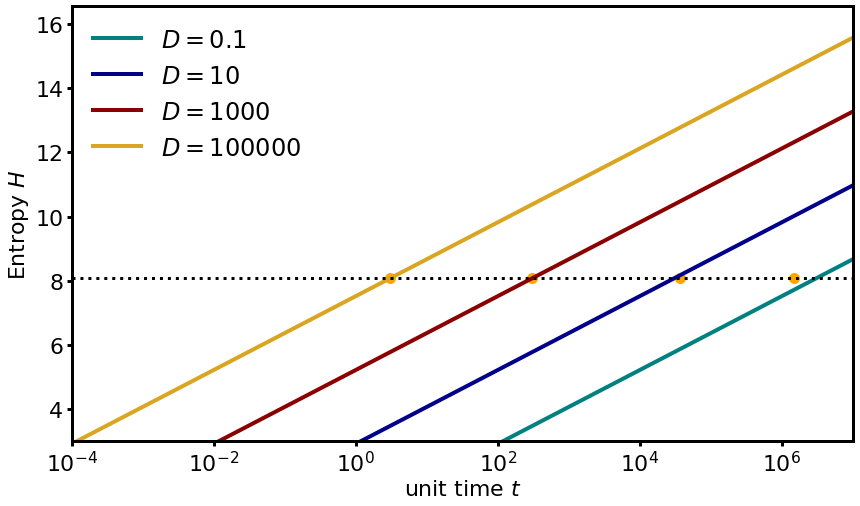

In [37]:
# define plot dimensions
width  = 14
height = 8
fig, ax1 = plt.subplots(1, figsize=(width,height))

x = np.arange(0.0001,10000000,1)

# plot entropy of advection-diffusion equation
ax1.plot(x, 0.5*np.log(4*np.pi*0.1*x) + 0.5, linestyle='-', linewidth=4, color='teal', alpha = 1, label=r'$D = 0.1$')
ax1.plot(x, 0.5*np.log(4*np.pi*10*x) + 0.5, linestyle='-', linewidth=4, color='darkblue', alpha = 1, label=r'$D = 10$')
ax1.plot(x, 0.5*np.log(4*np.pi*1000*x) + 0.5, linestyle='-', linewidth=4, color='darkred', alpha = 1, label=r'$D = 1000$')
ax1.plot(x, 0.5*np.log(4*np.pi*100000*x) + 0.5, linestyle='-', linewidth=4, color='goldenrod', alpha = 1, label=r'$D = 100000$')

ax1.scatter((3,300,36500,1460000),(8.1,8.1,8.1,8.1), s=100, color='orange')

ax1.axhline(y=8.1, linewidth=3, linestyle=':', color = 'black')

# axis parameters
#ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'unit time $t$',fontsize=22)
ax1.set_ylabel(r'Entropy $H$',fontsize=22)
ax1.tick_params(labelsize=22)
ax1.set_xlim(1E-4,1E7)
ax1.set_ylim(3,None)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.tick_params(axis='both', which='major', length=5, width=3)
ax1.tick_params(axis='both', which='minor', length=3, width=2)

plt.legend(loc=2, shadow=False, fancybox=False, numpoints=1, fontsize=24, frameon=False)

# save plot as png and pdf
#plt.savefig("gaussian_entropy.png", bbox_inches="tight", dpi=600)
#plt.savefig("gaussian_entropy.pdf", bbox_inches="tight")

plt.show()
plt.close()

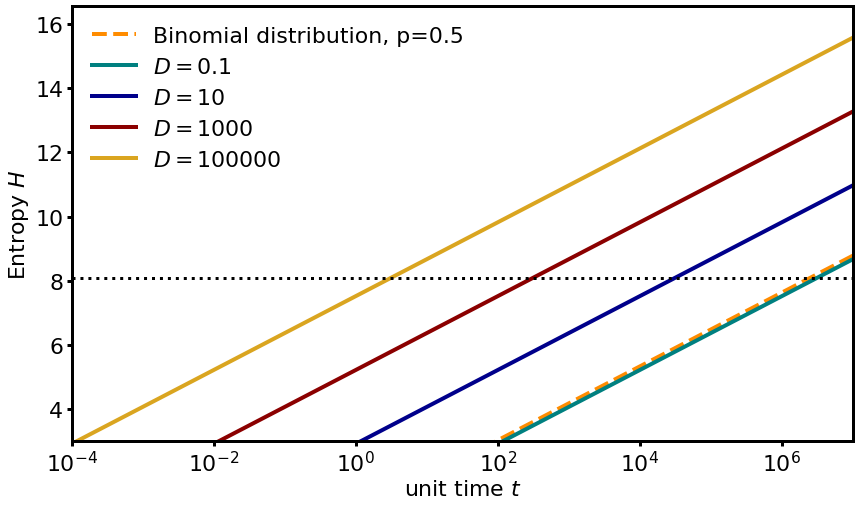

In [2]:
# define plot dimensions
width  = 14
height = 8
fig, ax1 = plt.subplots(1, figsize=(width,height))

x = np.arange(0.0001,10000000,1)

# plot entropy of binomial distribution
ax1.plot(x, 0.5*np.log(2*np.pi*0.5*0.5*x) + 0.5, linestyle='--', linewidth=4, color='darkorange', alpha = 1, label=r'Binomial distribution, p=0.5')

# plot entropy of advection-diffusion equation
ax1.plot(x, 0.5*np.log(4*np.pi*0.1*x) + 0.5, linestyle='-', linewidth=4, color='teal', alpha = 1, label=r'$D = 0.1$')
ax1.plot(x, 0.5*np.log(4*np.pi*10*x) + 0.5, linestyle='-', linewidth=4, color='darkblue', alpha = 1, label=r'$D = 10$')
ax1.plot(x, 0.5*np.log(4*np.pi*1000*x) + 0.5, linestyle='-', linewidth=4, color='darkred', alpha = 1, label=r'$D = 1000$')
ax1.plot(x, 0.5*np.log(4*np.pi*100000*x) + 0.5, linestyle='-', linewidth=4, color='goldenrod', alpha = 1, label=r'$D = 100000$')

ax1.axhline(y=8.1, linewidth=3, linestyle=':', color = 'black')

# axis parameters
#ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'unit time $t$',fontsize=22)
ax1.set_ylabel(r'Entropy $H$',fontsize=22)
ax1.tick_params(labelsize=22)
ax1.set_xlim(1E-4,1E7)
ax1.set_ylim(3,None)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
ax1.tick_params(axis='both', which='major', length=5, width=3)
ax1.tick_params(axis='both', which='minor', length=3, width=2)

plt.legend(loc=2, shadow=False, fancybox=False, numpoints=1, fontsize=22, frameon=False)

# save plot as png and pdf
plt.savefig("gaussian_entropy.png", bbox_inches="tight", dpi=600)
plt.savefig("gaussian_entropy.pdf", bbox_inches="tight")

plt.show()
plt.close()